In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import numpy as np
import sys
sys.path.append("../")
import sparse_coding.foldiak as foldiak

numInputs = 10000

params = {
    'inputSize'  : 64, 
    'outputSize' : 16, 
    'seed'       : -1,
    'alpha'      : 0.1,
    'beta'       : 0.02,
    'gamma'      : 0.02,
    'lam'        : 10,
    'p'          : 0.125
}

coder = foldiak.SparseCoder(**params)

16 random samples from the input patterns presented to the network.


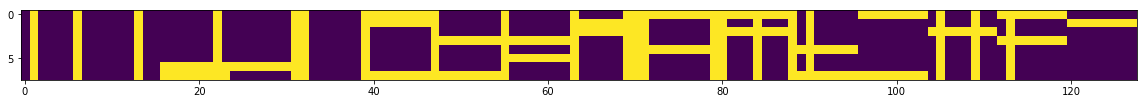

In [2]:
"""
Inputs
------
From Foldiak's paper: 

    ``On an 8 x 8 grid, each of the 16 possible lines are drawn 
      with a fixed probability (1/8) independently from all the others. 
      Pixels that are part of a drawn line have the value 1, all others are 0. 
      The network has 16 representation units.''
      
"""

inputVectors = np.zeros((numInputs, 8, 8))

for i in range(numInputs):
    while True:
        h = np.random.sample(8)
        v = np.random.sample(8)

        inputVectors[i][np.where(h <= 0.125)[0],:  ] = 1.
        inputVectors[i][:, np.where(v <= 0.125)[0] ] = 1.

        if np.any( inputVectors[i] == 1. ):
            break

inputVectors.resize((numInputs, 64))

print("16 random samples from the input patterns presented to the network.")
plt.figure(1, figsize=(20,10))
plt.imshow(inputVectors[:16].reshape(16*8,8).T)

In [3]:
"""
Pretraining
-----------
From Foldiak's paper: 

    ``Thresholds were allowed to reach stable values by 
      running the network with alpha = beta = 0, gamma = 0.1 
      for 100 cycles before training.''
  
"""
numEpochs = 100

coder._alpha = 0.0
coder._beta  = 0.0
coder._gamma = 0.1

for epoch in range(numEpochs):
    rndm  = np.random.choice(numInputs)
    x = inputVectors[rndm]
    coder.learn(x)

Epoch 2000Done learning.


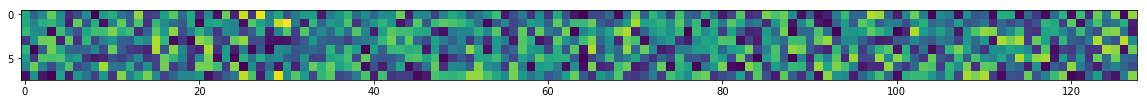

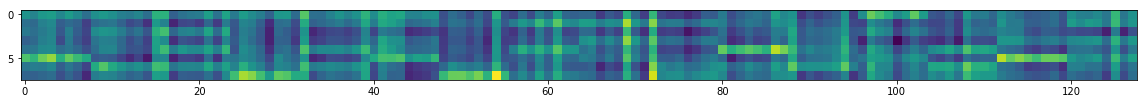

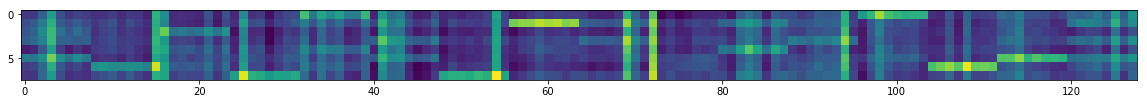

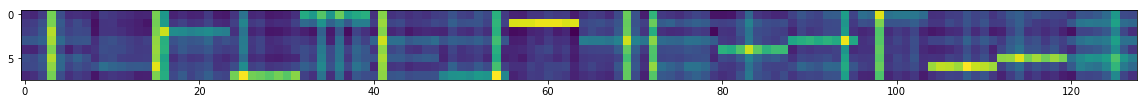

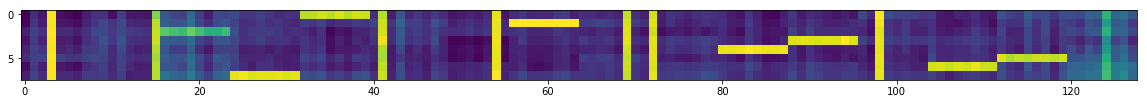

In [4]:
"""
Training
--------
"""
numEpochs = 2000

coder._alpha = 0.01
coder._beta  = 0.02
coder._gamma = 0.02

checkpoints = [0,400,800,1200,2000] 
fig_num = 1
for epoch in range(numEpochs+1):
    
    if epoch in checkpoints:
        plt.figure(fig_num, figsize=(20,10))
        plt.imshow(coder._Q.reshape(16*8,8).T, interpolation='none')
        fig_num += 1

    if epoch % 10 == 0:
        sys.stdout.flush()
        sys.stdout.write("\rEpoch %i" % epoch)
    r = np.random.choice(numInputs)
    x = inputVectors[r]
    coder.learn(x)

print("Done learning.")


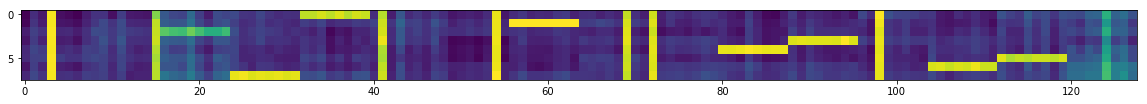

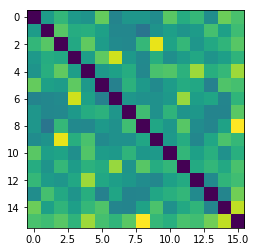

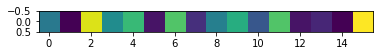

In [5]:
#  
# Learned features (visble-to-hidden connections)
#  
plt.figure(1, figsize=(20,10))
plt.imshow(coder._Q.reshape(16*8,8).T, interpolation='none')

# 
# Decorrelation weights 
# 
plt.figure(2)
plt.imshow(-coder._W, interpolation='none')

# 
# Activation thresholds 
# 
plt.figure(3)
plt.imshow(coder._t.reshape((1,16)), interpolation='none')

